# Torch Basics

In [1]:
import torch

#Construct a empty matrix, uninitialized
x = torch.empty(5,3)
print("Empty Tensor: ",x)
print("\n<"+"="*50+">\n")

x = torch.rand(5,3)
print("Random Initialized Tensor: ",x)
print("\n<"+"="*50+">\n")

x = torch.zeros(5,3,dtype=torch.long)
print("Tensor Initialized with Zeros: ",x)
print("\n<"+"="*50+">\n")

x=torch.tensor([5.5,3],dtype=torch.long)
print("Create tensor from data: ",x)
print("\n<"+"="*50+">\n")

x=x.new_ones(5,3,dtype=torch.double)
print('create a tensor based on existing tensor: ',x)
x=torch.randn_like(x,dtype=torch.float)
print('Create a random like tensor from exisitng tensor. x:',x)
print("\n<"+"="*50+">\n")

#size of tensor
print("Size of tensor: ",x.size())
print("\n<"+"="*50+">\n")

#addition of two matrices
x=torch.rand(5,3)
y=torch.rand(5,3)
print("Addition of tensor: ")
print("1st tensor: ",x)
print("2nd tensor: ",y)
print('x+y: ',x+y)
print("\n<"+"="*50+">\n")

#converting tensor to numpy array
print("After converting tensor x to numpy: ",x.numpy())
print("X does not change: ",x)
print("\n<"+"="*50+">\n")

#converting numpy array to torch tensor
import numpy as np
a = np.ones(5)
print("before converting a: ",a)
b=torch.from_numpy(a)
print("after converting a to tensor b: ",b)
np.add(a,1,out=a)
print("After addition a is: ",a)
print("After addition of a, b also changes: ",a)
print("\n<"+"="*50+">\n")

Empty Tensor:  tensor([[1.4244e-36, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8026e-45],
        [0.0000e+00, 1.1210e-44, 0.0000e+00],
        [1.4013e-45, 0.0000e+00, 1.0643e+15]])

<==================================================>

Random Initialized Tensor:  tensor([[0.8536, 0.6576, 0.8152],
        [0.8994, 0.2075, 0.1426],
        [0.8389, 0.3819, 0.7531],
        [0.4298, 0.0935, 0.5189],
        [0.9103, 0.1960, 0.0477]])

<==================================================>

Tensor Initialized with Zeros:  tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

<==================================================>

Create tensor from data:  tensor([5, 3])

<==================================================>

create a tensor based on existing tensor:  tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.

## Check if CUDA is available

In [2]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[1.2011, 1.1860, 1.1746],
        [1.0269, 1.7579, 1.1991],
        [1.9329, 1.4447, 1.1035],
        [1.1447, 1.9108, 1.9446],
        [1.2344, 1.9216, 1.2134]], device='cuda:0')
tensor([[1.2011, 1.1860, 1.1746],
        [1.0269, 1.7579, 1.1991],
        [1.9329, 1.4447, 1.1035],
        [1.1447, 1.9108, 1.9446],
        [1.2344, 1.9216, 1.2134]], dtype=torch.float64)


##Gradient Calculation:

In [3]:
import torch
# Creating the graph
# Only Tensors of floating point dtype can require gradi
x = torch.tensor(1.0, requires_grad = True)
z = x ** 3
z.backward() #Computes the gradient 
print("Gradient Calculated: ",x.grad.data) #Prints '3' which is dz/dx 

Gradient Calculated:  tensor(3.)


# Implementing Neural Networks from scratch

##Importing Python and PyTorch Libraries

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from sklearn.model_selection import train_test_split
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## identify and specify the GPU as the device


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

SEED = 19

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if device == torch.device("cuda"):
    torch.cuda.manual_seed_all(SEED)
    print("GPU Name: ",torch.cuda.get_device_name(0))

GPU Name:  Tesla T4


##Importing Training, Validation and Testing Data. Converting to type tensor and generating custom PyTorch DataLoader


test_inputs:  5000
validation_inputs:  5000
test_labels:  5000
validation_labels:  5000
train dataset size:  torch.Size([60000, 28, 28])
validation dataset size:  torch.Size([5000, 28, 28])
test dataset size:  torch.Size([5000, 28, 28])

<=========================Visualize Images=========================>



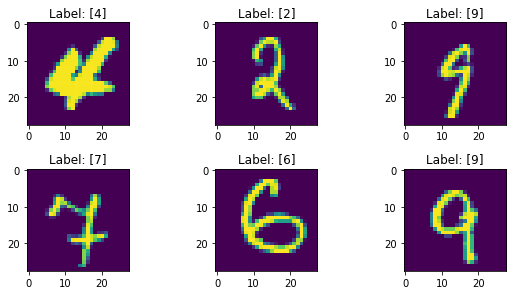

In [6]:
train_dataset = dsets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = dsets.MNIST(root='./data',transform=transforms.ToTensor(),train=False)
test_inputs,validation_inputs,test_labels,validation_labels = train_test_split(test_dataset.data,
                                                                                 test_dataset.targets,
                                                                                 random_state=SEED,
                                                                                 test_size=0.5,
                                                                                 stratify = test_dataset.targets
                                                                                 )

print('test_inputs: ',len(test_inputs))
print('validation_inputs: ',len(validation_inputs))
print('test_labels: ',len(test_labels))
print('validation_labels: ',len(validation_labels))

# convert all our data into torch tensors, required data type for our model
test_inputs = test_inputs.type(torch.float)
validation_inputs = validation_inputs.type(torch.float)

print("train dataset size: ",train_dataset.data.size())
print("validation dataset size: ",validation_inputs.data.size())
print("test dataset size: ",test_inputs.data.size())


batch_size=100
n_iters = 3000
num_epochs = int(n_iters/(len(train_dataset)/batch_size))

train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size)
validation_data = torch.utils.data.TensorDataset(validation_inputs,validation_labels)
validation_loader = torch.utils.data.DataLoader(validation_data,batch_size=batch_size)
test_data = torch.utils.data.TensorDataset(test_inputs,test_labels)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size)

# visualize some images

print("\n<"+"="*25+"Visualize Images"+"="*25+">\n")

sample_loader = torch.utils.data.DataLoader(train_dataset, 
                                            batch_size=1, 
                                            shuffle=True)

fig = plt.figure(figsize=(8, 6))
for i,(j,k) in enumerate(sample_loader):
  if(i>5):
    break
  ax = plt.subplot(3, 3, i+1)
  ax.imshow(j.squeeze())
  plt.tight_layout()
  title = 'Label: {}'.format(k.cpu().numpy())
  ax.set_title(title)

plt.show()

## Creating Convolutional Neural Network using PyTorch

In [0]:
class NeuralNetwork(nn.Module):
  def __init__(self):
    super(NeuralNetwork,self).__init__()
    # 1 input channel, 6 output channel, 3X3 square convolution
    #Convolution 1
    self.conv1 = nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5,stride=1,padding=2)
    self.relu1= nn.ReLU()

    #max pool
    self.maxpool1=nn.MaxPool2d(kernel_size=2)

    #Convolution 1
    self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5,stride=1,padding=2)
    self.relu2= nn.ReLU()

    #max pool
    self.maxpool2=nn.MaxPool2d(kernel_size=2)

    # Fully connected 1 (readout)
    self.fc1 = nn.Linear(32 * 7 * 7, 10)

  def forward(self, x):
    #conv1
    out = self.conv1(x)
    out = self.relu1(out)

    #maxpool1
    out = self.maxpool1(out)
    
    #conv2
    out = self.conv2(out)
    out = self.relu2(out)

    #maxpool2
    out = self.maxpool2(out)

    # Resize
    # Original size: (100, 32, 7, 7)
    # out.size(0): 100
    # New out size: (100, 32*7*7)
    # print("out size: ",out.size())
    out = out.view(out.size(0), -1)

    # Linear function (readout)
    out = self.fc1(out)
    return out

## Train Model Funciton

In [0]:
def train_model(model,train_loader,validation_loader,num_epochs,optimizer,criterion,lr=1e-3):
  model = model.cuda() if torch.cuda.is_available() else model
  model.train()
  optimizer = optimizer  
  iter = 0
  for epoch in range(num_epochs):
      for i,(images, labels) in enumerate(train_loader): #(images, labels)

          images = images.to(device)
          labels = labels.to(device)
          
          # Load images
          images = images.requires_grad_()
          #print(images.shape)
          # Clear gradients w.r.t. parameters
          optimizer.zero_grad()

          # Forward pass to get output/logits
          outputs = model(images)

          # Calculate Loss: softmax --> cross entropy loss
          loss = criterion(outputs, labels)

          # Getting gradients w.r.t. parameters
          loss.backward()

          # Updating parameters
          optimizer.step()

          iter += 1

          if iter % 500 == 0:              
              print(" Training Loss: {}".format(loss))
              test_model(model=model,test_loader=validation_loader)

## Test Model Function

In [0]:
def test_model(model,test_loader):
  # Calculate Accuracy         
  correct = 0
  total = 0
  model.eval()
  # Iterate through test dataset
  for batch in test_loader:
      
      # Add batch to GPU
      batch = tuple(t.to(device) for t in batch)
      # Unpack the inputs from our dataloader
      images, labels = batch

      # Load images
      images = images.requires_grad_().unsqueeze(1)

      # Forward pass only to get logits/output
      outputs = model(images)

      # Get predictions from the maximum value
      _, predicted = torch.max(outputs.data, 1)
      
      # Total number of labels
      total += labels.size(0)

      # Total correct predictions
      correct += (predicted == labels).sum()
      
  accuracy = 100 * correct / total

  # Print Loss
  print('Total count: ',total)
  print('Total correct: ',correct.cpu().numpy())
  for param_group in optimizer.param_groups:
    print("Learning Rate: ",param_group['lr'])
  print('Accuracy: {}'.format(accuracy))          

## Putting everything together

In [10]:
learning_rate=1e-3
model = NeuralNetwork()
optimizer=torch.optim.AdamW(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
print("\n<"+"="*25+"Training Model"+"="*25+">\n")
train_model(model=model,train_loader=train_loader,validation_loader=validation_loader,num_epochs=num_epochs,optimizer=optimizer,criterion=criterion,lr=learning_rate)
print("\n<"+"="*25+"Testing Model"+"="*25+">\n")
test_model(model=model,test_loader=test_loader)


<=========================Training Model=========================>

 Training Loss: 0.1313277631998062
Total count:  5000
Total correct:  4860
Learning Rate:  0.001
Accuracy: 97
 Training Loss: 0.0429699532687664
Total count:  5000
Total correct:  4905
Learning Rate:  0.001
Accuracy: 98
 Training Loss: 0.04887785017490387
Total count:  5000
Total correct:  4913
Learning Rate:  0.001
Accuracy: 98
 Training Loss: 0.014993314631283283
Total count:  5000
Total correct:  4914
Learning Rate:  0.001
Accuracy: 98
 Training Loss: 0.006276171188801527
Total count:  5000
Total correct:  4946
Learning Rate:  0.001
Accuracy: 98
 Training Loss: 0.24145302176475525
Total count:  5000
Total correct:  4951
Learning Rate:  0.001
Accuracy: 99

<=========================Testing Model=========================>

Total count:  5000
Total correct:  4940
Learning Rate:  0.001
Accuracy: 98
